In [1]:
import os
from PIL import Image
import numpy as np
import pandas as pd

data=[]
basepath='C:/Users/asus/Desktop/face/dataset/'
for folder in os.scandir(basepath):
    if folder.is_dir():
        #print(folder.name)
        for file in os.scandir(folder.path):
            im=np.array(Image.open(file.path))
            features=np.mean(im, axis=(0, 1)).tolist()
            features.append(folder.name)
            data.append(features)
            #print(features)
df = pd.DataFrame(data, columns=['R','G','B','class'])
df.to_csv('C:/Users/asus/Desktop/face/curadata2.csv',index=False)

  

    
    
    


In [2]:
df = pd.read_csv('C:/Users/asus/Desktop/face/curadata2.csv')

print(df)

lX = df[df['class']=='with mask']
mX = df[df['class']=='without mask']







               R           G           B         class
0      67.087151   66.707728   54.488076     with mask
1     198.265671  191.720642  181.579222     with mask
2     142.600540  155.985555  162.660061     with mask
3     189.614340  172.547116  165.720553     with mask
4     158.995510  138.251694  142.553746     with mask
...          ...         ...         ...           ...
1371  167.542677  147.002636  144.633973  without mask
1372  147.536697  126.054709  123.851811  without mask
1373  156.124796  134.304936  132.032148  without mask
1374  170.551865  163.393882  158.487521  without mask
1375  170.580683  163.229153  158.785913  without mask

[1376 rows x 4 columns]


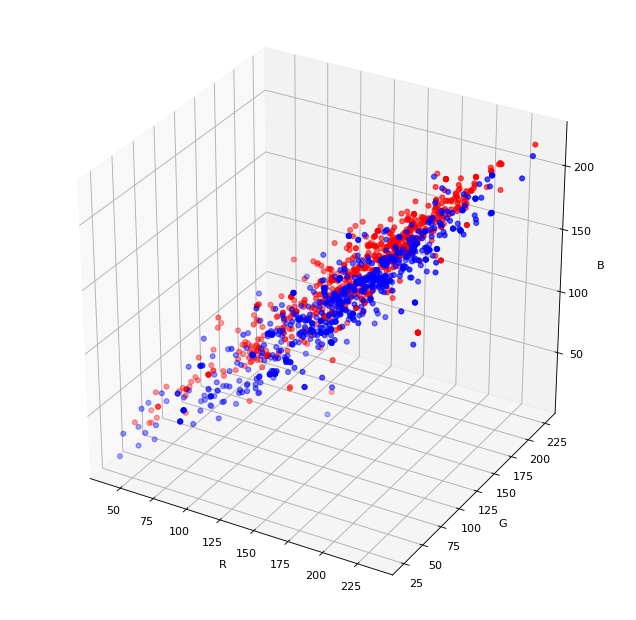

In [3]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

%matplotlib inline

plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.axes(projection='3d')

ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B');

ax.scatter3D(lX['R'], lX['G'], lX['B'],color='r')
ax.scatter3D(mX['R'], mX['G'], mX['B'],color='b')







In [4]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
print(X)
print(y)

le = preprocessing.LabelEncoder()
y=le.fit(y).transform(y)

print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)







[[ 67.08715102  66.70772789  54.48807619]
 [198.26567075 191.72064218 181.57922177]
 [142.60053955 155.98555487 162.66006131]
 ...
 [156.12479556 134.30493575 132.03214807]
 [170.55186483 163.3938821  158.48752139]
 [170.58068304 163.22915257 158.78591331]]
['with mask' 'with mask' 'with mask' ... 'without mask' 'without mask'
 'without mask']
[0 0 0 ... 1 1 1]


In [5]:
from sklearn.svm import SVC

svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))









[[180  54]
 [ 70 151]]
              precision    recall  f1-score   support

           0       0.72      0.77      0.74       234
           1       0.74      0.68      0.71       221

    accuracy                           0.73       455
   macro avg       0.73      0.73      0.73       455
weighted avg       0.73      0.73      0.73       455



Enter image path : C:\Users\asus\Desktop\face\dataset\with mask\50-with-mask.jpg
The person is with mask


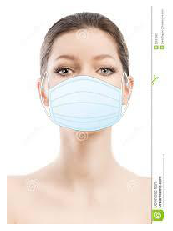

In [8]:

from PIL import Image
import matplotlib.pyplot as plt

image=input("Enter image path : ")
im=np.array(Image.open(image))
features=np.mean(im, axis=(0, 1)).tolist()
yp=svclassifier.predict([features])
yp=le.inverse_transform(yp)
print('The person is '+yp[0])
plt.axis("off")
plt.imshow(im)
plt.show()